In [1]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## 1. Création du signal

on cherche à modéliser un carré pour ce la on va prendre 100 points

### 1.1 Carré

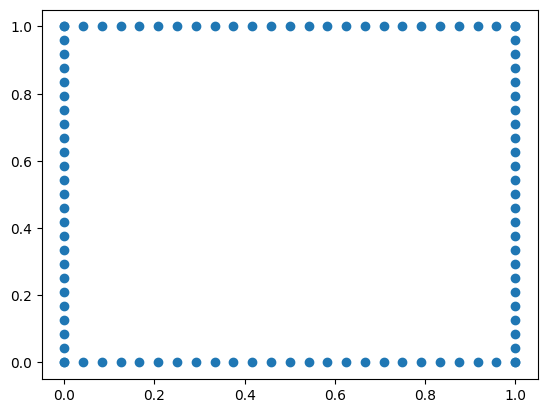

In [85]:
def carré(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i)
        Y.append(0)
    for j in x:
        X.append(long)
        Y.append(j)
    for i in x[::-1]:
        X.append(i)
        Y.append(long)
    for j in x[::-1]:
        X.append(0)
        Y.append(j)
    return X,Y


X,Y=carré(100,1)

plt.scatter(X,Y)


### 1.2 Passage en complexe

In [99]:

def complexification(X,Y):
    L=[]
    for x in range(len(X)):
        L.append(X[x]+1j*Y[x])
    return L

L=complexification(X,Y)

#L=[2*i*np.exp(np.pi/4*1j) for i in L]

print(L)

### 1.3 Transformation signal

[0j, (0.041666666666666664+0j), (0.08333333333333333+0j), (0.125+0j), (0.16666666666666666+0j), (0.20833333333333331+0j), (0.25+0j), (0.29166666666666663+0j), (0.3333333333333333+0j), (0.375+0j), (0.41666666666666663+0j), (0.4583333333333333+0j), (0.5+0j), (0.5416666666666666+0j), (0.5833333333333333+0j), (0.625+0j), (0.6666666666666666+0j), (0.7083333333333333+0j), (0.75+0j), (0.7916666666666666+0j), (0.8333333333333333+0j), (0.875+0j), (0.9166666666666666+0j), (0.9583333333333333+0j), (1+0j), (1+0j), (1+0.041666666666666664j), (1+0.08333333333333333j), (1+0.125j), (1+0.16666666666666666j), (1+0.20833333333333331j), (1+0.25j), (1+0.29166666666666663j), (1+0.3333333333333333j), (1+0.375j), (1+0.41666666666666663j), (1+0.4583333333333333j), (1+0.5j), (1+0.5416666666666666j), (1+0.5833333333333333j), (1+0.625j), (1+0.6666666666666666j), (1+0.7083333333333333j), (1+0.75j), (1+0.7916666666666666j), (1+0.8333333333333333j), (1+0.875j), (1+0.9166666666666666j), (1+0.9583333333333333j), (1+1j

## 2. Décomposition de fourrier

In [100]:
from scipy.fft import fft, ifft

def fourrier_decompo(Liste_complexes,f):
    n=len(Liste_complexes)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for x in range(n)]]
    L=np.array(Liste_complexes)
    return np.sum(vect_exp*L.T)

list_fourrier=[fourrier_decompo(L,x) for x in range(len(L))]
print(list_fourrier)

print(fft(L))
len(L)


[(50+50j), (-39.579341819034795-42.14771814851596j), (-3.552713678800501e-15-1.7763568394002505e-15j), (-4.440892098500626e-15+1.3322676295501878e-15j), (-1.7763568394002505e-15+7.993605777301127e-15j), (-1.176498131654629-1.619310757877555j), (8.881784197001252e-15-1.0658141036401503e-14j), (-2.220446049250313e-15+1.099120794378905e-14j), (-1.0658141036401503e-14-4.884981308350689e-15j), (-0.24847809437339596-0.4519799757625207j), (-2.886579864025407e-15-1.6431300764452317e-14j), (1.7541523789077473e-14-1.3322676295501878e-15j), (-6.994405055138486e-15-1.1102230246251565e-14j), (-0.07159847996122659-0.18083711778477696j), (3.774758283725532e-14+2.19824158875781e-14j), (-9.769962616701378e-15-5.329070518200751e-15j), (-3.8413716652030416e-14-1.2434497875801753e-14j), (-0.01988972453425797-0.07746536251638236j), (2.4313884239290928e-14-2.5979218776228663e-14j), (4.7628567756419216e-14+7.749356711883593e-14j), (-3.5638159090467525e-14+6.439293542825908e-15j), (-0.003484672788490295-0.027

100

In [101]:
def fourrier_descript(Liste_complexes,f):
    n=len(Liste_complexes)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for x in range(n)]]
    L=np.array(Liste_complexes)
    abi=np.sum(vect_exp*L.T)
    return np.sqrt(abi.real**2+abi.imag**2)

list_fourrier=[fourrier_descript(L,x) for x in range(len(L))][1:]
#list_fourrier=[fourrier_decompo(L,x) for x in range(len(L))]
print((list_fourrier/list_fourrier[0])[1:])

fL=fft(L)
cL=np.sqrt(fL.real**2+fL.real**2)
inter=cL[1:]
sSp=(inter/inter[0])[1:]
print(sSp)
len(sSp)

[6.86989320e-17 8.01896358e-17 1.41626476e-16 3.46184268e-02
 2.39955054e-16 1.93939546e-16 2.02778255e-16 8.92067758e-03
 2.88540626e-16 3.04264343e-16 2.26948679e-16 3.36390551e-03
 7.55502820e-16 1.92479647e-16 6.98327685e-16 1.38326508e-03
 6.15412289e-16 1.57320578e-15 6.26362889e-16 4.80873152e-04
 1.02569254e-15 3.62158883e-16 1.12139302e-15 6.21336172e-16
 9.54396065e-16 1.70042000e-15 4.05065268e-16 2.89331135e-04
 5.07919318e-16 6.34913666e-16 1.30562570e-15 4.83799743e-04
 4.46084554e-16 7.91448240e-16 2.89955580e-16 6.29934138e-04
 2.04649754e-15 2.57831818e-15 2.07311993e-15 7.52957414e-04
 3.16536491e-16 2.18178688e-15 1.75969053e-15 8.68425077e-04
 1.71728866e-15 3.27799925e-15 1.13218492e-15 9.87610197e-04
 1.02382155e-15 6.00637025e-16 1.05997465e-15 1.12046176e-03
 2.58104297e-15 2.27301119e-15 5.29340275e-15 1.27773009e-03
 3.54259222e-15 1.11585881e-15 4.64398119e-16 1.47316000e-03
 2.87322619e-15 7.70454226e-15 4.80091775e-15 1.72662523e-03
 9.16552038e-16 2.871678

98

In [102]:
print(sSp)

[1.31211943e-17 0.00000000e+00 0.00000000e+00 2.97250555e-02
 4.94109478e-18 0.00000000e+00 0.00000000e+00 6.27797439e-03
 1.53820120e-18 0.00000000e+00 0.00000000e+00 1.80898612e-03
 1.97804362e-18 0.00000000e+00 0.00000000e+00 5.02527925e-04
 4.04870938e-19 0.00000000e+00 0.00000000e+00 8.80427169e-05
 6.97573022e-19 0.00000000e+00 0.00000000e+00 1.19214915e-17
 5.29817442e-20 0.00000000e+00 0.00000000e+00 5.29734278e-05
 3.63286604e-18 0.00000000e+00 0.00000000e+00 1.75760152e-04
 2.18021432e-18 0.00000000e+00 0.00000000e+00 3.38755684e-04
 7.14054557e-18 0.00000000e+00 0.00000000e+00 5.29897793e-04
 8.70288860e-20 0.00000000e+00 0.00000000e+00 7.45671771e-04
 5.20939227e-18 0.00000000e+00 0.00000000e+00 9.87610197e-04
 2.49139093e-33 0.00000000e+00 0.00000000e+00 1.26117051e-03
 6.71590804e-18 0.00000000e+00 0.00000000e+00 1.57596634e-03
 1.47157810e-19 0.00000000e+00 0.00000000e+00 1.94720715e-03
 1.65008272e-17 0.00000000e+00 0.00000000e+00 2.39883882e-03
 7.50434692e-18 0.000000

In [77]:
trunc_four=list_fourrier[:(len(L))]

### 3. $TF^{-1}$

In [47]:
def tf_1(coeff_fourriers,x):
    k=len(coeff_fourriers)
    n=len(coeff_fourriers)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for f in range(k)]]
    L=np.array(coeff_fourriers[0:k])
    return 1/n*np.sum(vect_exp*L.T)
    
    



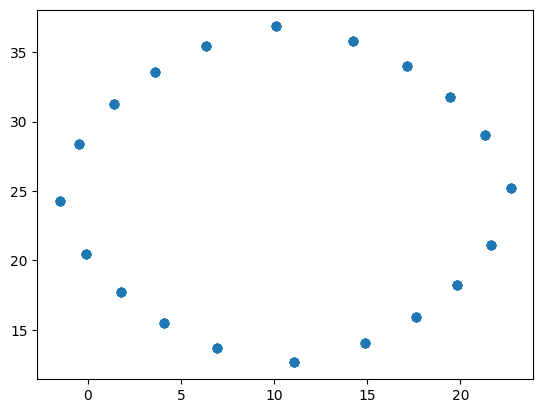

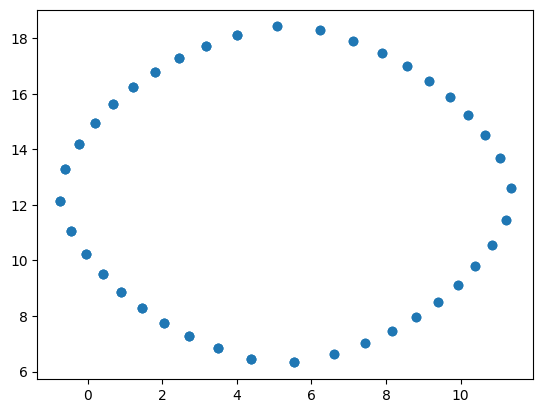

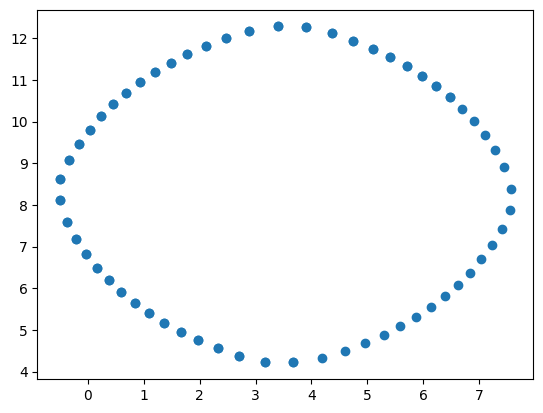

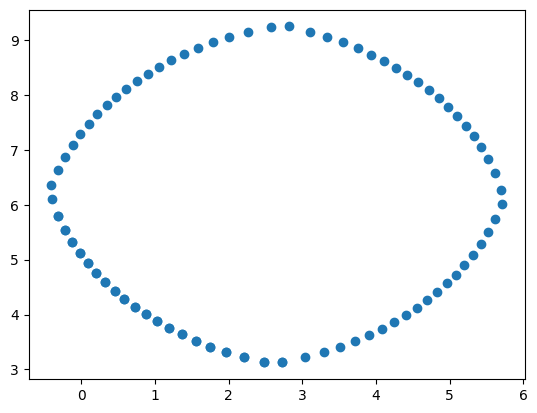

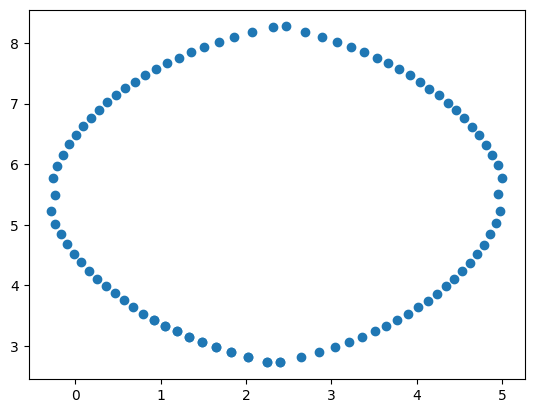

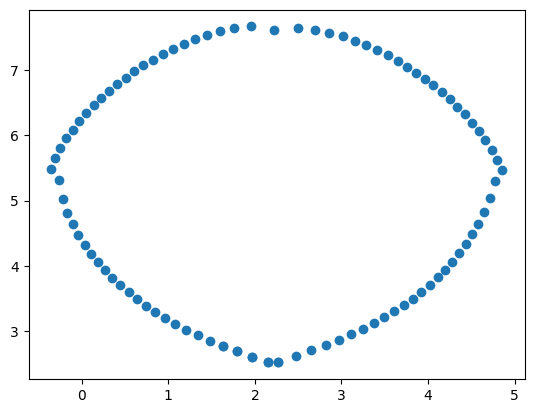

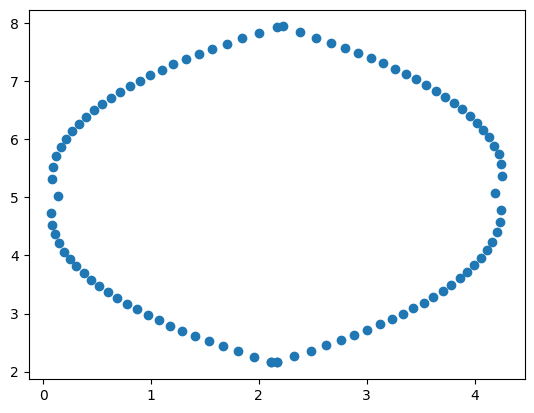

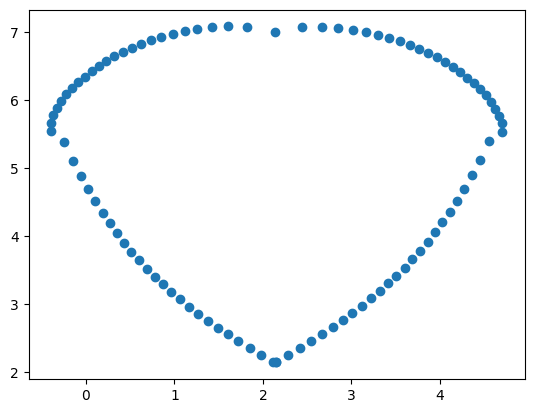

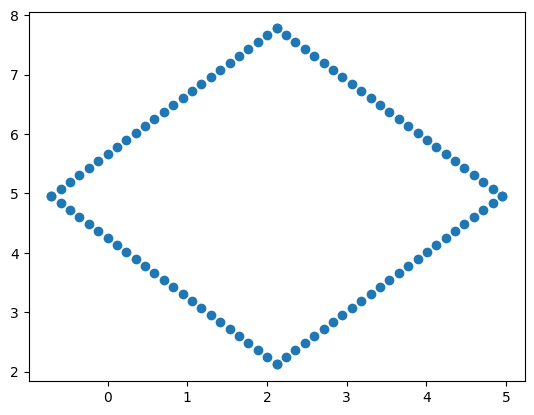

In [51]:
for n in [80,60,40,20,10,5,2,1,0]:
    
    trunc_four=list_fourrier[:(len(L)-n)]
    
    long=len(L)
    s_reconstruit=[tf_1(trunc_four,x) for x in range(long)]

    X=[x.real for x in s_reconstruit]
    Y=[y.imag for y in s_reconstruit]

    plt.scatter(X,Y)
    plt.show()
    